
Generate a random Eordos-Reyni netowrk with N nodes and avergae conectivity K



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_erdos_renyi_network(N, avg_degree):
    # Calculate the probability of edge creation
    p = avg_degree / (N - 1)

    # Generate the Erdős-Rényi graph
    G = nx.erdos_renyi_graph(N, p)

    return G



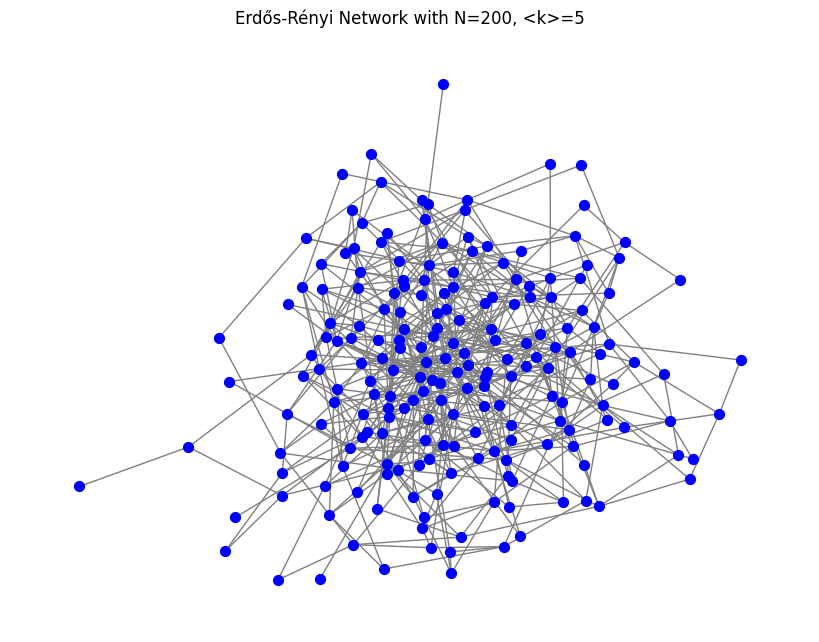

In [ ]:
# Parameters
N = 200  # Number of nodes
avg_degree = 5  # Average connectivity

# Generate the network
G = generate_erdos_renyi_network(N, avg_degree)

# Plot the network
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=50, node_color='blue', edge_color='gray', with_labels=False)
plt.title(f"Erdős-Rényi Network with N={N}, <k>={avg_degree}")
plt.show()

Inicially, a state or opinion is randomly assigned to
all nodes: with probability f a node will be assigned
opinion σ+ = +1 and with probability 1−f opinion
σ+=-1 (or 0, as in the Ising model).

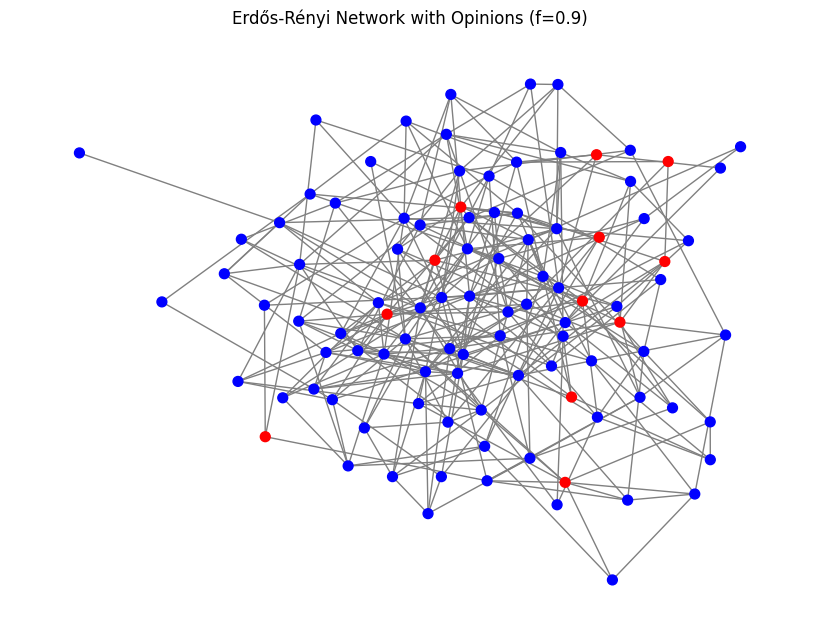

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def assign_opinions(G, f):
    """
    Assign opinions to nodes in the graph.
    Nodes have opinion +1 with probability f, and -1 with probability (1-f).
    """
    opinions = {}
    for node in G.nodes():
        # Assign opinion +1 with probability f, and -1 otherwise
        opinions[node] = 1 if random.random() < f else -1

    # Add opinions as node attributes
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

# Parameters
N = 100  # Number of nodes
avg_degree = 6  # Average connectivity
f = 0.9  # Probability of assigning opinion +1

# Generate Erdős-Rényi network
G = nx.erdos_renyi_graph(N, avg_degree / (N - 1))

# Assign opinions to nodes
opinions = assign_opinions(G, f)

# Visualize the network with opinions
plt.figure(figsize=(8, 6))
node_colors = ["blue" if opinions[node] == 1 else "red" for node in G.nodes()]
nx.draw(G, node_color=node_colors, node_size=50, with_labels=False, edge_color="gray")
plt.title(f"Erdős-Rényi Network with Opinions (f={f})")
plt.show()


On each time step, each node i updates its opinion
to assume the state of the local majority, that is, the
opinion sustained by the majority of its neighbours
(nodes linked to i). In case of pairing, the node i
keeps its own current opinion. All of the updates
are made simultaneously at each simulation step.

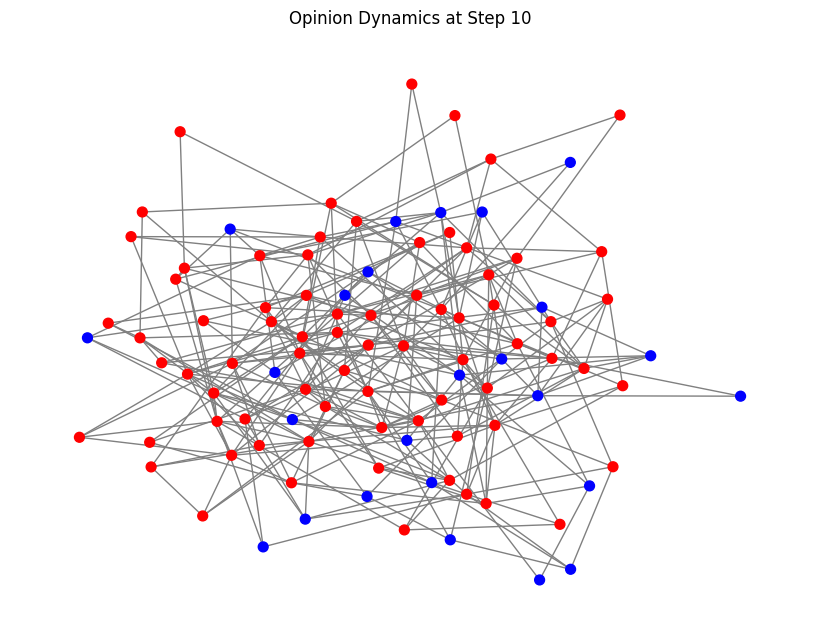

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")

def simulate_opinion_dynamics(G, f, steps):
    """Simulate opinion dynamics for a given number of steps."""
    # Initialize opinions
    opinions = initialize_opinions(G, f)

    for step in range(steps):
        update_opinions(G)

    return G

def visualize_network(G, step):
    """Visualize the network with node opinions."""
    node_colors = ["blue" if G.nodes[node]["opinion"] == 1 else "red" for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_color=node_colors, node_size=50, with_labels=False, edge_color="gray")
    plt.title(f"Opinion Dynamics at Step {step}")
    plt.show()

# Parameters
N = 100  # Number of nodes
avg_degree = 6  # Average connectivity
f = 0.5  # Probability of +1 opinions initially
steps = 10  # Number of simulation steps

# Generate Erdős-Rényi network
G = nx.erdos_renyi_graph(N, avg_degree / (N - 1))

# Simulate opinion dynamics
simulate_opinion_dynamics(G, f, steps)

# Visualize the final network
visualize_network(G, steps)


The system is considered to reach a stable state if
no more changes occur.


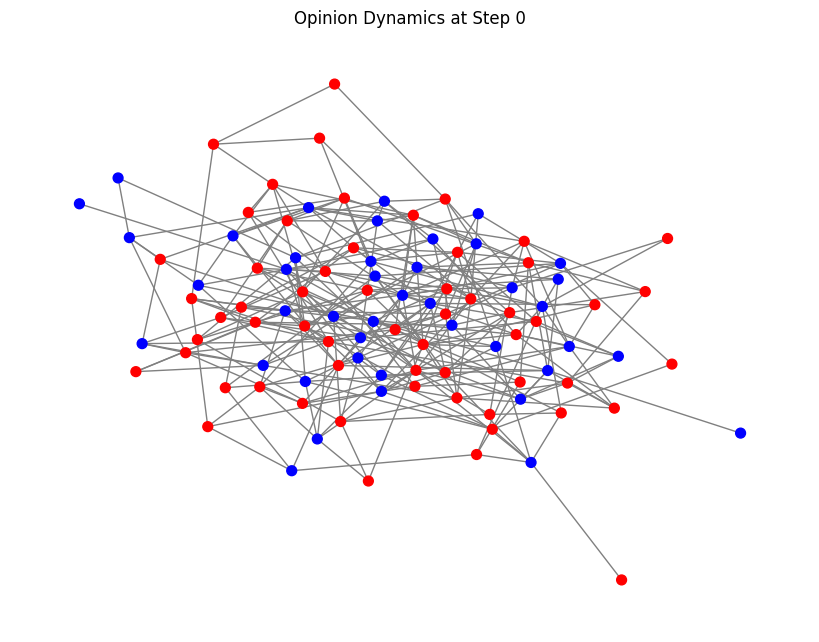

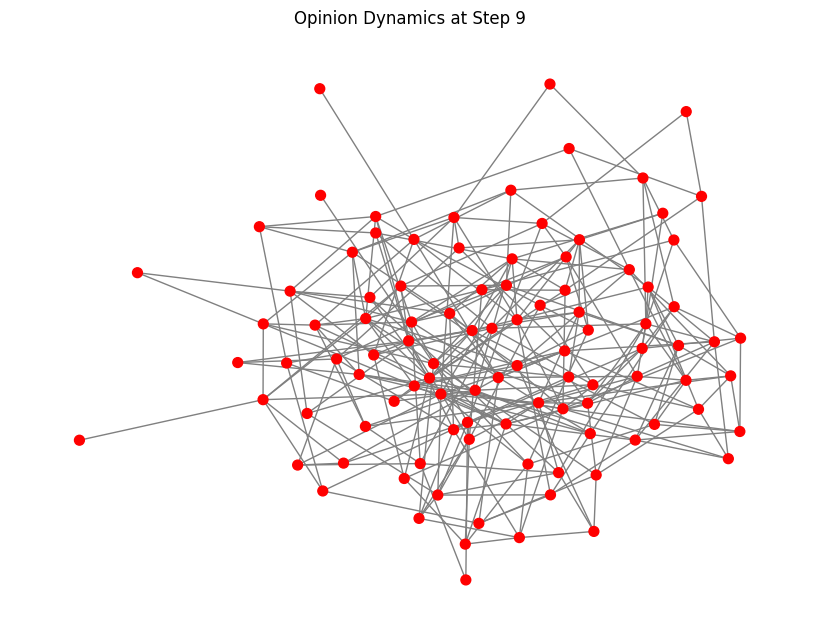

Stable state reached at step 9


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Visualize the network at intermediate steps (optional)
        if step % 10 == 0 or changes == 0:
            visualize_network(G, step)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")
    return G

def visualize_network(G, step):
    """Visualize the network with node opinions."""
    node_colors = ["blue" if G.nodes[node]["opinion"] == 1 else "red" for node in G.nodes]
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_color=node_colors, node_size=50, with_labels=False, edge_color="gray")
    plt.title(f"Opinion Dynamics at Step {step}")
    plt.show()

# Parameters
N = 100  # Number of nodes
avg_degree = 6  # Average connectivity
f = 0.5  # Probability of +1 opinions initially

# Generate Erdős-Rényi network
G = nx.erdos_renyi_graph(N, avg_degree / (N - 1))

# Simulate until stable state
simulate_until_stable(G, f)


##START EXERCISE

Using parameters N=200000, hki=10, f=0.5 run

your program until steady state is reached. An av-
eraging of unless 100 instances should be needed to

get stable results. Plot the S+ ratio (density of σ+
units) vs. time step.

Stable state reached at step 15


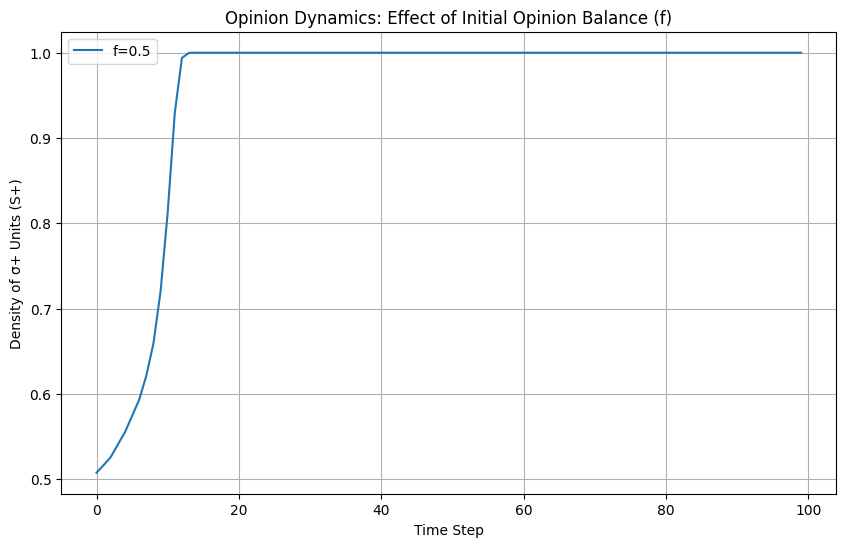

In [9]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0
    densities = []  # Track the S+ ratio over time

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Calculate the S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    # Pad the density list to match the max_steps
    densities.extend([densities[-1]] * (max_steps - len(densities)))

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")

    return densities

def plot_results(f_values, all_densities, max_steps):
    """Plot the S+ ratio for different initial opinion balances (f)."""
    plt.figure(figsize=(10, 6))

    for i, f in enumerate(f_values):
        plt.plot(range(max_steps), all_densities[i], label=f"f={f}")

    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: Effect of Initial Opinion Balance (f)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 50000  # Number of nodes
hki = 10  # Average degree
max_steps = 100  # Maximum number of time steps
f_values = [0.5]  # Initial opinion balance values

# Run simulation for different values of f
all_densities = []

for f in f_values:
    # Generate Erdős-Rényi network with the given average degree
    G = nx.erdos_renyi_graph(N, hki / (N - 1))

    # Simulate the opinion dynamics and track densities over time
    densities = simulate_until_stable(G, f, max_steps)
    all_densities.append(densities)

# Plot the results
plot_results(f_values, all_densities, max_steps)


Using the parameter set N=200000, hki=10, and
several values of the initial opinion balance in the
range f=[0.1, 0.9], provide conclusions about the
effect of the f in the process.

1.   List item
2.   List item



Stable state reached at step 2
Stable state reached at step 3
Stable state reached at step 3
Stable state reached at step 4
Stable state reached at step 6
Stable state reached at step 10
Stable state reached at step 7
Stable state reached at step 16
Stable state reached at step 10
Stable state reached at step 8
Stable state reached at step 7
Stable state reached at step 5
Stable state reached at step 4
Stable state reached at step 3
Stable state reached at step 2


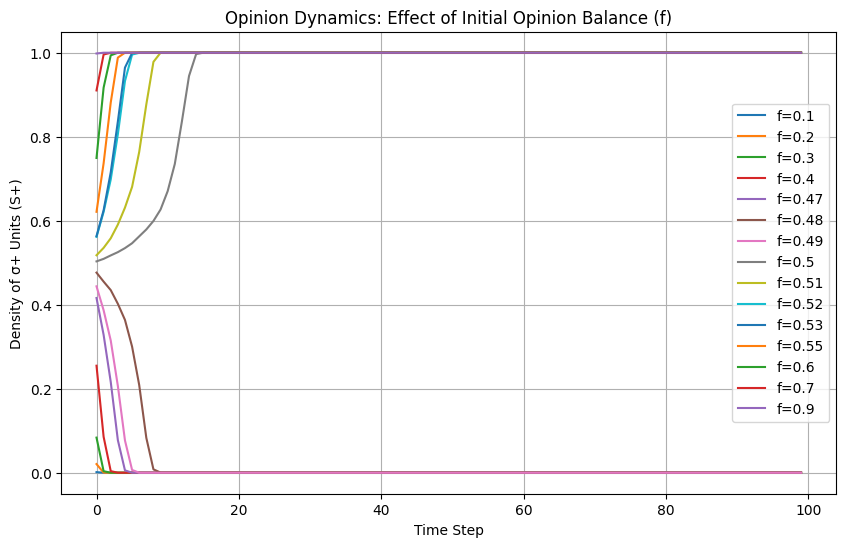

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0
    densities = []  # Track the S+ ratio over time

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Calculate the S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    # Pad the density list to match the max_steps
    densities.extend([densities[-1]] * (max_steps - len(densities)))

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")

    return densities

def plot_results(f_values, all_densities, max_steps):
    """Plot the S+ ratio for different initial opinion balances (f)."""
    plt.figure(figsize=(10, 6))

    for i, f in enumerate(f_values):
        plt.plot(range(max_steps), all_densities[i], label=f"f={f}")

    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: Effect of Initial Opinion Balance (f)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 5000  # Number of nodes
hki = 10  # Average degree
max_steps = 100  # Maximum number of time steps
f_values = [0.1, 0.2, 0.3, 0.4, 0.47, 0.48,0.49, 0.5,0.51,0.52,0.53, 0.55, 0.6, 0.7, 0.9]  # Initial opinion balance values

# Run simulation for different values of f
all_densities = []

for f in f_values:
    # Generate Erdős-Rényi network with the given average degree
    G = nx.erdos_renyi_graph(N, hki / (N - 1))

    # Simulate the opinion dynamics and track densities over time
    densities = simulate_until_stable(G, f, max_steps)
    all_densities.append(densities)

# Plot the results
plot_results(f_values, all_densities, max_steps)


Using the parameter set N=200000, f=0.5 and sev-
eral average degrees in the range hki=[2,100], pro-
vide conclusions about the effect of the connectiv-
ity.

Max steps reached; system may not have stabilized.
Max steps reached; system may not have stabilized.
Max steps reached; system may not have stabilized.
Max steps reached; system may not have stabilized.
Stable state reached at step 23
Stable state reached at step 18
Stable state reached at step 41
Stable state reached at step 11
Stable state reached at step 5
Stable state reached at step 4


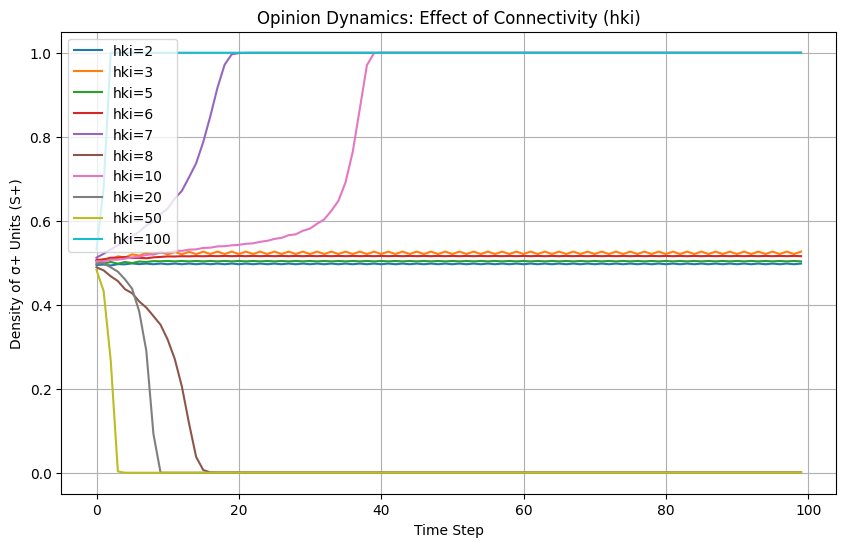

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0
    densities = []  # Track the S+ ratio over time

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Calculate the S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")

    return densities

def plot_results(hki_values, all_densities, max_steps):
    """Plot the S+ ratio for different average degrees (hki)."""
    plt.figure(figsize=(10, 6))

    for i, hki in enumerate(hki_values):
        # Get the actual number of steps for the current simulationaa
        densities = all_densities[i]

        # Pad the densities with the last value until it matches max_steps
        if len(densities) < max_steps:
            densities = densities + [densities[-1]] * (max_steps - len(densities))

        plt.plot(range(max_steps), densities, label=f"hki={hki}")

    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: Effect of Connectivity (hki)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 5000  # Number of nodes
f = 0.5  # Probability of +1 opinions initially
max_steps = 100  # Maximum number of time steps
hki_values = [2, 3, 5, 6, 7,8, 10, 20, 50, 100]  # Average degrees to test

# Run simulation for different values of hki
all_densities = []

for hki in hki_values:
    # Generate Erdős-Rényi network with the given average degree
    G = nx.erdos_renyi_graph(N, hki / (N - 1))

    # Simulate the opinion dynamics and track densities over time
    densities = simulate_until_stable(G, f, max_steps)
    all_densities.append(densities)

# Plot the results
plot_results(hki_values, all_densities, max_steps)


##START EXERCISE with free network

In [ ]:
##START EXERCISE with free network (Barabási–Albert model)

Simulating: 100%|██████████| 100/100 [01:08<00:00,  1.47it/s]


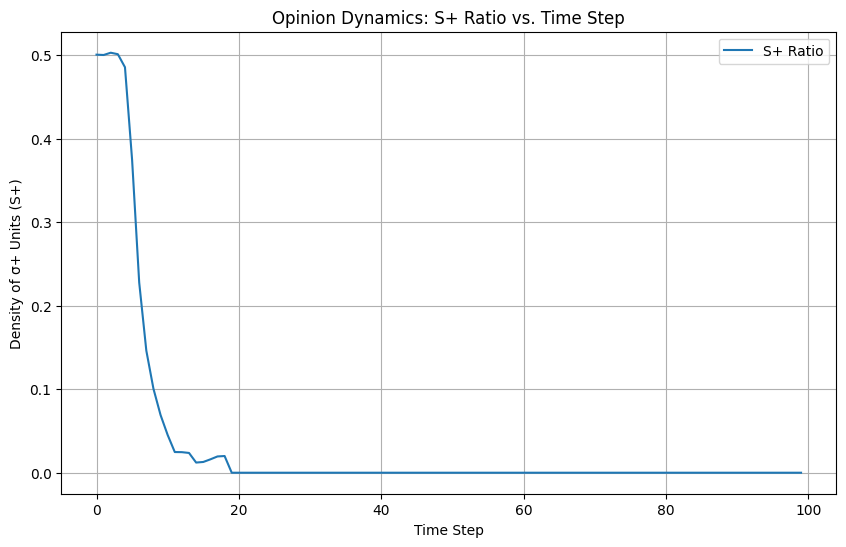

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    densities = []  # Track the S+ ratio over time
    step = 0

    while step < max_steps:
        # Calculate S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # Update opinions and count changes
        changes = update_opinions(G)
        if changes == 0:
            break  # Stable state reached
        step += 1

    return densities

def run_simulation(N, f, max_steps, num_instances, m):
    """Run multiple instances of the simulation and average results."""
    avg_densities = np.zeros(max_steps)

    for _ in tqdm(range(num_instances), desc="Simulating"):
        # Generate Barabási-Albert scale-free network with m edges per new node
        G = nx.barabasi_albert_graph(N, m)
        initialize_opinions(G, f)

        # Simulate dynamics
        densities = simulate_until_stable(G, max_steps)

        # Accumulate results (up to the length of the current instance)
        for t, density in enumerate(densities):
            avg_densities[t] += density

    # Average over the number of instances
    avg_densities /= num_instances
    return avg_densities

def plot_results(avg_densities, max_steps):
    """Plot the S+ ratio over time."""
    plt.figure(figsize=(10, 6))
    plt.plot(range(max_steps), avg_densities, label="S+ Ratio")
    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: S+ Ratio vs. Time Step")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 5000  # Number of nodes
f = 0.50  # Initial fraction of σ+ opinions
max_steps = 100  # Maximum number of time steps
num_instances = 100  # Number of simulations for averaging
m = 10  # Number of edges per new node in the Barabási-Albert model

# Run the simulation and plot results
avg_densities = run_simulation(N, f, max_steps, num_instances, m)
plot_results(avg_densities, max_steps)

Stable state reached at step 1
Stable state reached at step 2
Stable state reached at step 2
Stable state reached at step 3
Stable state reached at step 4
Stable state reached at step 4
Stable state reached at step 6
Stable state reached at step 5
Stable state reached at step 6
Stable state reached at step 5
Stable state reached at step 4
Stable state reached at step 4
Stable state reached at step 3
Stable state reached at step 2
Stable state reached at step 2


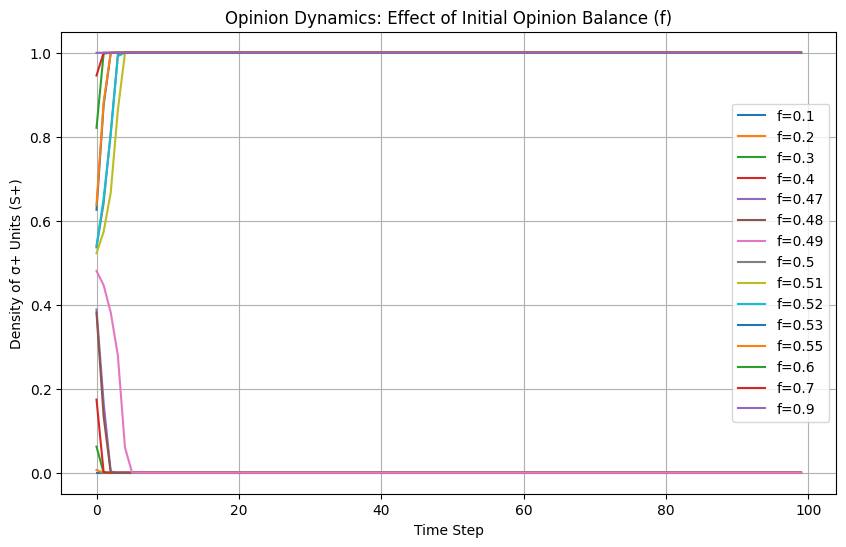

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0
    densities = []  # Track the S+ ratio over time

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Calculate the S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    # Pad the density list to match the max_steps
    densities.extend([densities[-1]] * (max_steps - len(densities)))

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")

    return densities

def plot_results(f_values, all_densities, max_steps):
    """Plot the S+ ratio for different initial opinion balances (f)."""
    plt.figure(figsize=(10, 6))

    for i, f in enumerate(f_values):
        plt.plot(range(max_steps), all_densities[i], label=f"f={f}")

    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: Effect of Initial Opinion Balance (f)")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 5000  # Number of nodes
k = 10  # Number of edges each new node will create
max_steps = 100  # Maximum number of time steps
f_values = [0.1, 0.2, 0.3, 0.4, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.55, 0.6, 0.7, 0.9]  # Initial opinion balance values

# Run simulation for different values of f
all_densities = []

for f in f_values:
    # Generate Barabási-Albert network with given number of nodes and k edges per new node
    G = nx.barabasi_albert_graph(N, k)

    # Simulate the opinion dynamics and track densities over time
    densities = simulate_until_stable(G, f, max_steps)
    all_densities.append(densities)

# Plot the results
plot_results(f_values, all_densities, max_steps)

Max steps reached; system may not have stabilized.
Max steps reached; system may not have stabilized.
Stable state reached at step 8
Stable state reached at step 8
Stable state reached at step 11
Stable state reached at step 9
Stable state reached at step 7
Stable state reached at step 4
Stable state reached at step 3
Stable state reached at step 3


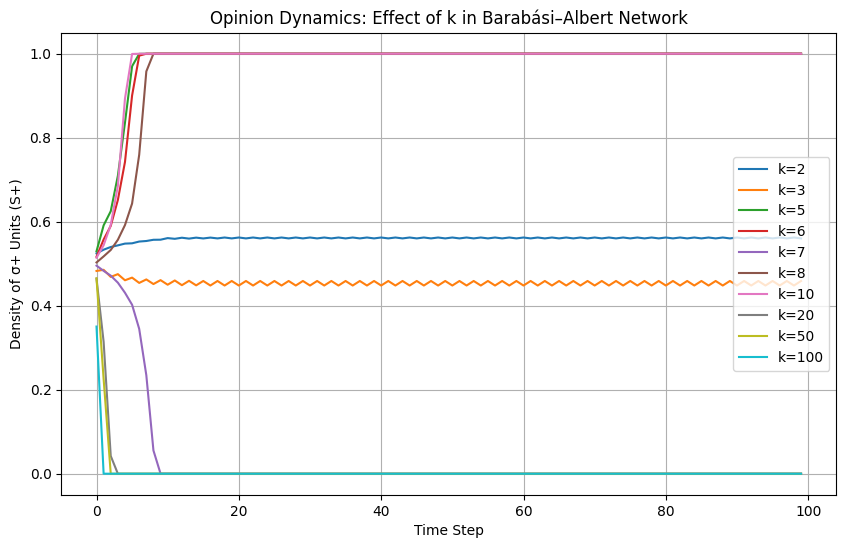

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

def initialize_opinions(G, f):
    """Initialize opinions for all nodes."""
    opinions = {node: 1 if random.random() < f else -1 for node in G.nodes}
    nx.set_node_attributes(G, opinions, "opinion")
    return opinions

def update_opinions(G):
    """Update opinions based on the local majority rule."""
    new_opinions = {}
    changes = 0  # Track how many nodes change their opinions

    for node in G.nodes:
        neighbors = list(G.neighbors(node))
        current_opinion = G.nodes[node]["opinion"]

        # Count the opinions of neighbors
        neighbor_opinions = [G.nodes[neighbor]["opinion"] for neighbor in neighbors]
        majority = sum(neighbor_opinions)  # +1s add, -1s subtract

        # Apply the majority rule
        if majority > 0:
            new_opinions[node] = 1
        elif majority < 0:
            new_opinions[node] = -1
        else:  # Tie case
            new_opinions[node] = current_opinion

        # Check if the opinion has changed
        if new_opinions[node] != current_opinion:
            changes += 1

    # Update the graph with new opinions
    nx.set_node_attributes(G, new_opinions, "opinion")
    return changes

def simulate_until_stable(G, f, max_steps=1000):
    """Simulate opinion dynamics until a stable state is reached."""
    # Initialize opinions
    initialize_opinions(G, f)
    step = 0
    densities = []  # Track the S+ ratio over time

    while step < max_steps:
        # Update opinions and count changes
        changes = update_opinions(G)

        # Calculate the S+ ratio
        opinions = nx.get_node_attributes(G, "opinion")
        s_plus_ratio = sum(1 for o in opinions.values() if o == 1) / len(opinions)
        densities.append(s_plus_ratio)

        # If no changes, the system is stable
        if changes == 0:
            print(f"Stable state reached at step {step}")
            break

        step += 1

    if step == max_steps:
        print("Max steps reached; system may not have stabilized.")

    return densities

def plot_results(k_values, all_densities, max_steps):
    """Plot the S+ ratio for different values of k."""
    plt.figure(figsize=(10, 6))

    for i, k in enumerate(k_values):
        # Get the actual number of steps for the current simulation
        densities = all_densities[i]

        # Pad the densities with the last value until it matches max_steps
        if len(densities) < max_steps:
            densities = densities + [densities[-1]] * (max_steps - len(densities))

        plt.plot(range(max_steps), densities, label=f"k={k}")

    plt.xlabel("Time Step")
    plt.ylabel("Density of σ+ Units (S+)")
    plt.title("Opinion Dynamics: Effect of k in Barabási–Albert Network")
    plt.legend()
    plt.grid()
    plt.show()

# Parameters
N = 10000  # Number of nodes
f = 0.5  # Probability of +1 opinions initially
max_steps = 100  # Maximum number of time steps
k_values = [2, 3, 5, 6, 7, 8, 10, 20, 50, 100]  # Values of k (number of edges a new node attaches to)

# Run simulation for different values of k
all_densities = []

for k in k_values:
    # Generate Barabási–Albert network with the given value of k
    G = nx.barabasi_albert_graph(N, k)

    # Simulate the opinion dynamics and track densities over time
    densities = simulate_until_stable(G, f, max_steps)
    all_densities.append(densities)

# Plot the results
plot_results(k_values, all_densities, max_steps)
